# Desarrollo de una aplicación con *streamlit* que permita distinguir en una imagen entre perro y gato

> Técnicas de desarrollo avanzado de aplicaciones BigData
>
> José de Martín Hernández

Para realizar esta actividad nos basaremos en [este artículo](https://www.kaggle.com/code/sakshamgulati/catdog).

Importamos las librerías que vamos a usar.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

Para poder trabajar con las imágenes, necesitaremos que los valores RGB estén expresados en una escala de 0 a 1, en lugar de la escala de 0 a 255 en la que están. Por ello, usaremos la función `ImageDataGenerator` con el argmento `rescale = 1./255`.

Además, para introducir mayor variabilidad en las imágenes de entrenamiento, para que el modelo estime mejor cualquier nueva imagen, haremos uso de otros argumentos de esta función:
* `rotation_range`: rotaremos las imágenes un ángulo aleatorio entre -45 y 45 grados.
* `width_shift_range`: desplazaremos las imágenes horizontalemente una cantidad aleatoria entre 0 y el 10 % de la anchura de la imagen.
* `height_shift_range`: desplazaremos las imágenes verticalmente una cantidad aleatoria entre 0 y el 10 % de la altura de la imagen.
* `shear_range`: aplicaremos un cizallamiento a la imagen con un ángulo aleatorio entre -45 y 45 grados.
* `zoom_range`: aplicaremos una ampliación aleatoria a la imagen entre 0 y el 10 % de la dimensión original.
* `horizontal_flip`: aleatoriamente, reflejaremos algunas imágenes horizontalmente (el eje de reflexión es vertical).
* `vertical_flip`: aleatoriamente, reflejaremos algunas imágenes verticalmente (el eje de reflexión es horizontal).
* `fill_mode`: al hacer las transformaciones anteriores, habrá áreas del recuadro donde no quede imagen, por lo que rellenaremos esos huecos con los trozos de imagen que hayan quedado fuera del recuadro.

In [2]:
transformacion_imagenes_entrenamiento = ImageDataGenerator(rescale = 1./255,
                                                           rotation_range = 45,
                                                           width_shift_range = 0.1,
                                                           height_shift_range = 0.1,
                                                           shear_range = 45,
                                                           zoom_range = [0.9, 1.0],
                                                           horizontal_flip = True,
                                                           vertical_flip = True,
                                                           fill_mode = 'wrap')

transformacion_imagenes_test = ImageDataGenerator(rescale=1./255)

Para poder trabajar luego con las imágenes, necesitaremos también que sean todas del mismo tamaño. Así que las forzaremos a ser cuadradas de 200 x 200 píxeles.
Como tenemos que clasificar las imágenes en dos grupos, indicamos `class_mode = 'binary'`.
A la hora de cargar los datos, el genereador obtendrá `batch_size = 32` imágenes por lote, barajaremos el orden en el que se seleccionan las imágenes (`shuffle`) y fijaremos una semilla para poder replicar este orden y las transformaciones que se apliquen a las imágenes.

In [3]:
entrenamiento = transformacion_imagenes_entrenamiento.flow_from_directory(
    directory = r'C:\Users\josdeher\Documents\6º Máster\Técnicas de desarrollo avanzado de aplicaciones big data\Actividad 2\training_set',
    color_mode = 'rgb',
    target_size = (200, 200),
    class_mode = 'binary',
    batch_size = 32,
    shuffle = True,
    seed = 0)

test = transformacion_imagenes_test.flow_from_directory(
    directory = r'C:\Users\josdeher\Documents\6º Máster\Técnicas de desarrollo avanzado de aplicaciones big data\Actividad 2\test_set',
    color_mode = 'rgb',
    target_size = (200, 200),
    class_mode = 'binary',
    batch_size = 32,
    shuffle = True,
    seed = 1)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


Para comprobar que las imágenes se han cargado y se han transformado correctamente mostraremos algunas.

Estas son las imágenes de entrenamiento:

In [4]:
# Creamos un diccionario de las clases para poder mostrarlas en las imágenes
clases = entrenamiento.class_indices
diccionario_clase = dict((indice, clase) for clase, indice in clases.items())

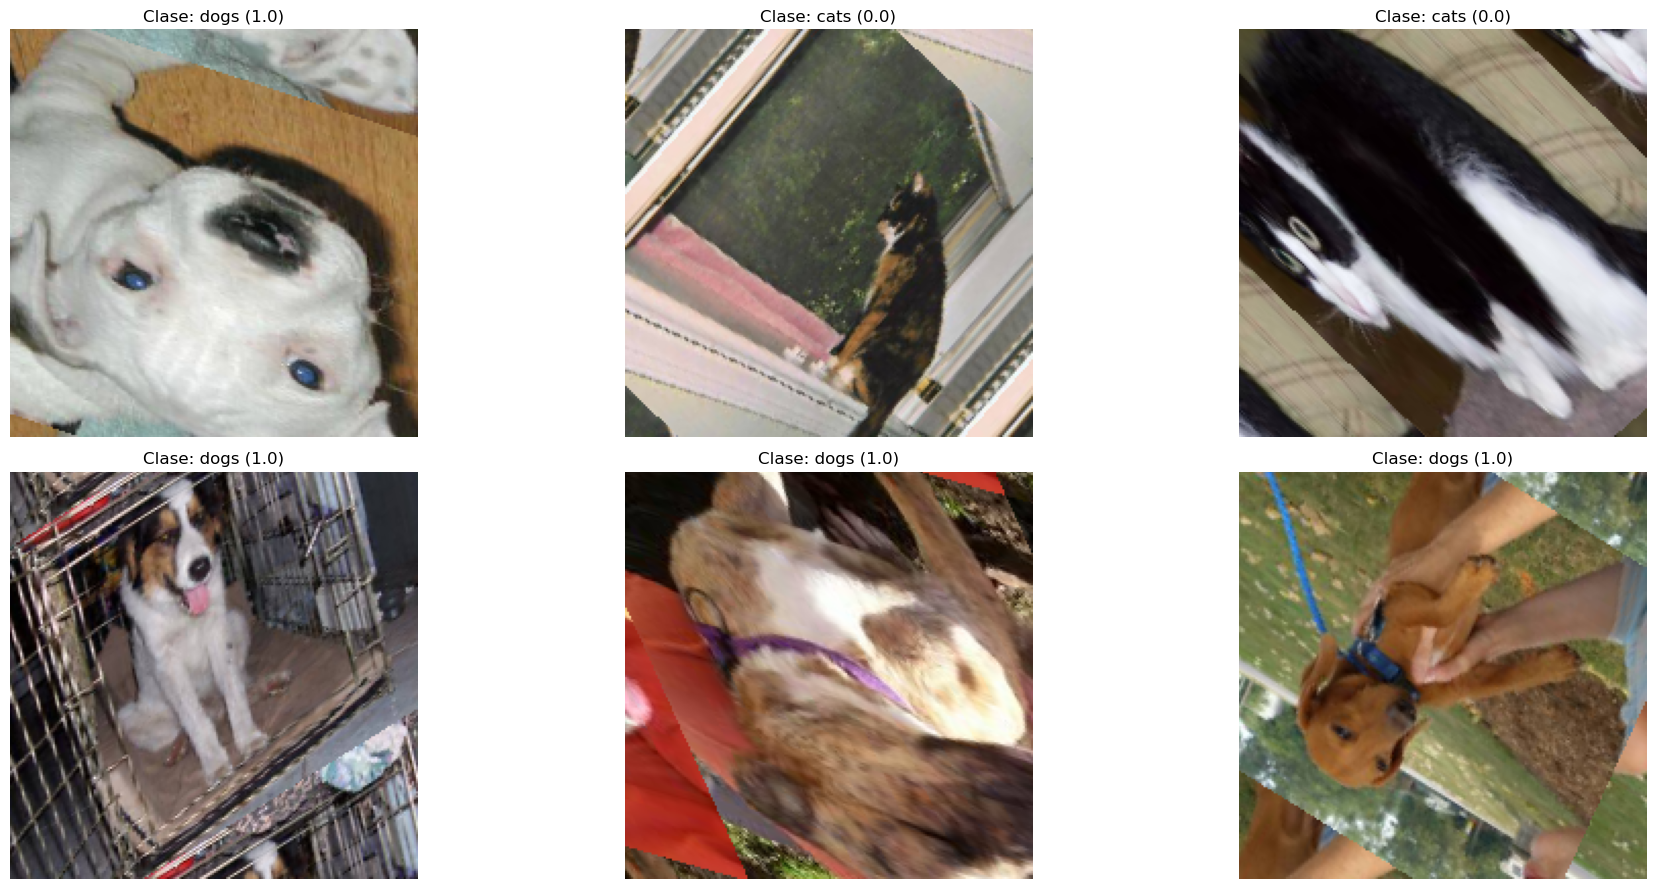

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(20, 9)) 
axes = axes.flatten()

for i, ax in enumerate(axes):
    # Mostramos la imagen
    ax.imshow(entrenamiento[0][0][i])
    # Mostramos el grupo de la imagen (perro o gato)
    ax.set_title(label = f'Clase: {diccionario_clase[entrenamiento[0][1][i]]} ({entrenamiento[0][1][i]})')
    # Quitamos los ejes y los números
    ax.axis('off')

plt.tight_layout()
plt.show()

Y estas son las imágenes de test:

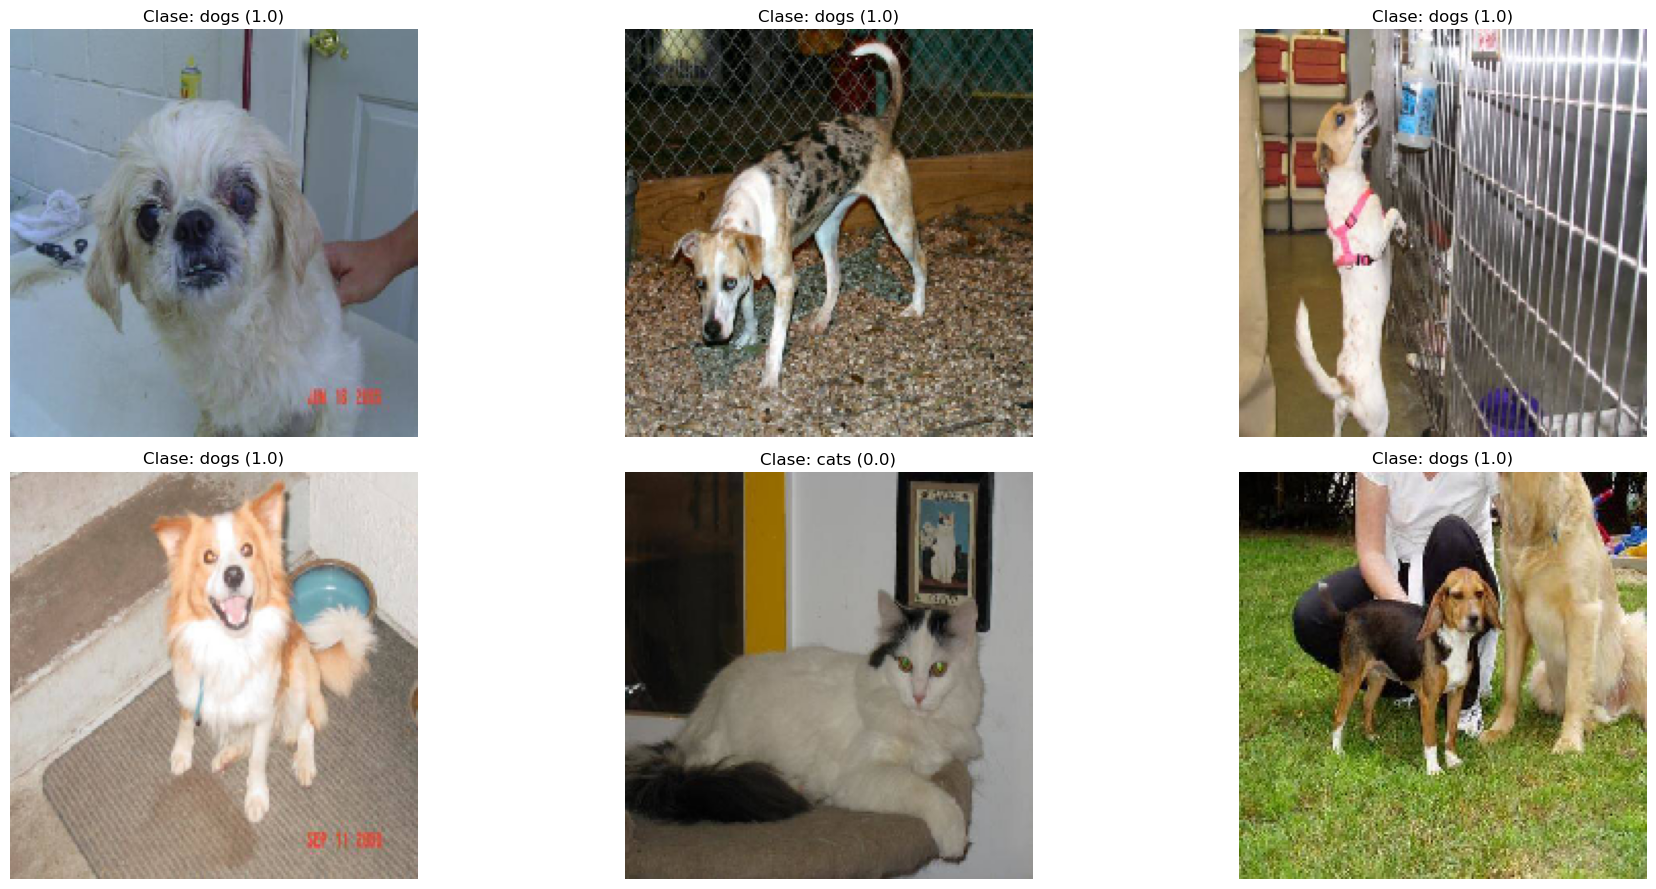

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(20, 9)) 
axes = axes.flatten()

for i, ax in enumerate(axes):
    # Mostramos la imagen
    ax.imshow(test[0][0][i])
    # Mostramos el grupo de la imagen (perro o gato)
    ax.set_title(label = f'Clase: {diccionario_clase[test[0][1][i]]} ({test[0][1][i]})')
    # Quitamos los ejes y los números
    ax.axis('off')

plt.tight_layout()
plt.show()

Creamos ahora el modelo de clasificación:

In [ ]:
model = Sequential([
    Conv2D(28, kernel_size = (3, 3), activation = 'relu', input_shape = (200, 200, 3)),
    Conv2D(64, kernel_size = (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Conv2D(128, kernel_size = (3, 3), activation = 'relu'),
    Conv2D(128, kernel_size = (3, 3), activation = 'relu'),
    Flatten(),
    Dense(256, activation = 'relu'),
    Dropout(0.2),
    Dense(1, activation = 'sigmoid')
])

In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [10]:
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [12]:
import time
start_time = time.time()

model.fit(
    entrenamiento,
    steps_per_epoch=100,
    epochs=100,
    validation_data=test,
    validation_steps=50)

print('---%s minutes---'% round(time.time()/60 - start_time/60, 2))

Epoch 1/100


C:\Users\josdeher\AppData\Local\anaconda3\envs\python\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 300s 3s/step - accuracy: 0.5225 - loss: 0.7589 - val_accuracy: 0.4950 - val_loss: 0.6890
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.5346 - loss: 0.6898 - val_accuracy: 0.5556 - val_loss: 0.6916
Epoch 3/100


C:\Users\josdeher\AppData\Local\anaconda3\envs\python\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 92s 913ms/step - accuracy: 0.5496 - loss: 0.6902 - val_accuracy: 0.5269 - val_loss: 0.6901
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.5359 - loss: 0.6869 - val_accuracy: 0.6288 - val_loss: 0.6800
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.5619 - loss: 0.6835 - val_accuracy: 0.5869 - val_loss: 0.6723
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 72s 716ms/step - accuracy: 0.5724 - loss: 0.6777 - val_accuracy: 0.5981 - val_loss: 0.6756
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.5788 - loss: 0.6749 - val_accuracy: 0.6212 - val_loss: 0.6447
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.6102 - loss: 0.6582 - val_accuracy: 0.6288 - val_loss: 0.6562
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 85s 850ms/step - accuracy: 0.6386 - loss: 0.6487 - val_accuracy: 0.5900 - val_loss: 0.6631
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.6330 - loss: 0.6477 - val_a

In [ ]:
import time
start_time = time.time()

model.fit(entrenamiento,
          steps_per_epoch = 32,
          epochs = 100,
          validation_data = test,
          validation_steps = 32)

print('---%s minutes---'% round(time.time()/60 - start_time/60, 2))

Epoch 1/100


In [13]:
loss, accuracy = model.evaluate(test)

64/64 ━━━━━━━━━━━━━━━━━━━━ 18s 282ms/step - accuracy: 0.8494 - loss: 0.3286


In [15]:
model.save('clasificador_perrogato.keras')

El modelo que hemos exportado lo usaremos en un archivo .py con el que crearemos la interfaz web de consulta.